# Precision recall e ROC

### ROC
TruePositiveRate = TruePositives / (TruePositives + False Negatives)   (RECALL)

FalsePositiveRate = FalsePositives / (FalsePositives + TrueNegatives)

<img src="ROC-Curve.jpg" width=600 height=600 />

### Precision Recall
Precision = TruePositives / (TruePositives + FalsePositives)

Recall = TruePositives / (TruePositives + FalseNegatives)

<img src="Precision-Recall-Curve.jpg" width=600 height=600 />

<img src="Precisionrecall.svg" width=300 height=300 />

https://sinyi-chou.github.io/classification-pr-curve/
#

When data is imbalanced, the AUC might not reflect the true performance of the classifier. The definition of the False Positive Rate (FPR), is the number of false positives divided by the number of negative samples. FPR is considered better when it’s smaller since it indicates fewer false positives. In imbalanced data, the FPR tends to stay at small values due to the large numbers of negatives (i.e. making the denominator large). Thus, FPR becomes less informative for the model performance in this situation.  - 
#### La FPR rimane piccola a causa dello sbilanciamento, non a causa della bont del modello

# Instrinsic Dimension

In [1]:
import skdim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generate data : np.array (n_points x n_dim). Here a uniformly sampled 5-ball embedded in 10 dimensions
dims = (1000,10)
data = np.zeros(dims)
data2 = np.ones(dims)
data_ball = data.copy()
data_ball[:,:5] = skdim.datasets.hyperBall(n = 1000, d = 5, radius = 1, random_state = 0)
data_ball2 = data2.copy()
data_ball2[:,:5] = skdim.datasets.hyperBall(n = 1000, d = 5, radius = 1, random_state = 0)

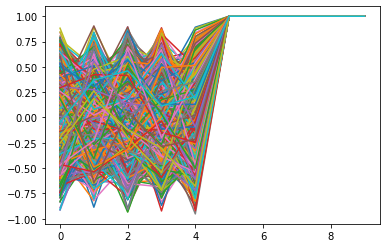

In [3]:
plt.plot(data_ball2.T);

In [7]:
#estimate global intrinsic dimension
danco = skdim.id.DANCo().fit(data_ball)
metodo = skdim.id.TwoNN()
#estimate local intrinsic dimension (dimension in k-nearest-neighborhoods around each point):
lpca = skdim.id.lPCA().fit_pw(data_ball, n_neighbors = 100, n_jobs = 1)

#get estimated intrinsic dimension
print(round(danco.dimension_,2), round(np.mean(lpca.dimension_pw_),2))

4.96 5.0


In [4]:
metodo.fit(data_ball).dimension_, metodo.fit(data_ball2).dimension_

(4.626589720639767, 4.626589720639767)

In [8]:
def calc(d=1000):
    dims = (d,32)
    data3 = np.ones(dims)
    data_ball3 = data3.copy()
    data_ball3[:,:2] = skdim.datasets.hyperBall(n = d, d = 2, radius = 1, random_state = 0)
    res = metodo.fit(data_ball)
    print(res.dimension_)

In [24]:
calc(12)

4.626589720639767


In [4]:
emb_array = np.load("emb_array.npy")

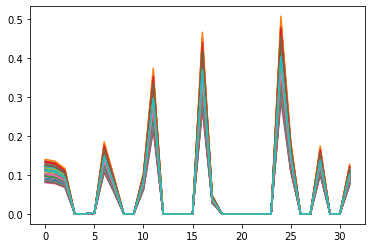

In [5]:
plt.plot(emb_array.T);

In [9]:
metodo.fit(emb_array)

mu: [1.00000000e+00 1.00000000e+00 1.00000262e+00 1.00000274e+00
 1.00000453e+00 1.00000846e+00 1.00000989e+00 1.00001562e+00
 1.00001884e+00 1.00001919e+00 1.00003421e+00 1.00191963e+00
 1.00615692e+00 1.00630927e+00 1.01112437e+00 1.03391445e+00
 1.04813123e+00 1.06887054e+00 1.09287345e+00 1.11436796e+00
 1.11776614e+00 1.12878001e+00 1.14790356e+00 1.15946531e+00
 1.17100346e+00 1.20315349e+00 1.24335921e+00 1.33967757e+00
 1.43432784e+00 1.43804467e+00 1.44501364e+00 1.53439975e+00
 1.55812871e+00 1.56353521e+00 1.64852667e+00 1.70138049e+00
 1.73647940e+00 1.73962903e+00 1.76634610e+00 1.81577623e+00
 1.87152660e+00 1.89030290e+00 1.97527456e+00 1.97922683e+00
 2.02961326e+00 2.10485888e+00 2.15153790e+00 2.28163695e+00
 2.35780931e+00 2.40396786e+00 2.40451241e+00 2.43292117e+00
 2.44666123e+00 2.53863597e+00 2.76100302e+00 3.97492146e+00
 4.00000000e+00 1.20981321e+01 1.28391676e+01 2.95672340e+01
 3.00968800e+01 1.32431543e+04 1.32433623e+04 1.33865459e+04
 1.33870049e+04 2.29

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Ho dovuto aggungere questa riga nel file _TwoNN.py per gestire questo problema che capita non so perchee con alcuni embeddings

mu = np.nan_to_num(mu, nan=0.000000001, posinf=9999999999, neginf=9999999999)


# Plot Saved Model

In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import matplotlib.pyplot as plt
from plot_model import plot_model, make_graph
from config_valid import Config
from models import GCN, AutoencoderGCN, ConfModelDecoder
from GridConfigurations import GridConfigurations
from graph_generation import GenerateGraph
from Dataset import Dataset
from train_autoencoder_inductive import Trainer_Autoencoder
from dictionary_of_trials import get_diz_trials
import numpy as np
import torch


def get_methods(object, spacing=20):
    methodList = []
    for method_name in dir(object):
        try:
            if callable(getattr(object, method_name)):
                methodList.append(str(method_name))
        except Exception:
            methodList.append(str(method_name))
    processFunc = (lambda s: ' '.join(s.split())) or (lambda s: s)
    for method in methodList:
        try:
            print(str(method.ljust(spacing)) + ' ' +
                  processFunc(str(getattr(object, method).__doc__)[0:90]))
        except Exception:
            print(method.ljust(spacing) + ' ' + ' getattr() failed')

In [2]:
# recupera la configurazione con cui è stato salvato il modello
config_class, diz_trials = get_diz_trials("configurations/Final1_4modelloading.yml")
#gc = GridConfigurations(config_class, diz_trials)
#gc.make_configs()
#config_class = gc.configs[0]

trainer = Trainer_Autoencoder(config_class, rootsave=Path("output_plots/autoencoder/7/"))
path = "output_plots/autoencoder/7/best-Grafi-ER________Classi4_nodi10_________grafiXtipo3____AE_CM__layers§1-64-64-64-32§__ELU__btchnrmSI__-xavier_normal_lr00001_ADAM/model"
path = "output_plots/autoencoder/7/Grafi-ER________Classi4_nodi10_________grafiXtipo3____AE_CM__layers§1-64-64-64-32§__ELU__btchnrmSI__-xavier_normal_lr00002_ADAM/model"
path = "output_plots/autoencoder/7/1_Grafi-ER________Classi4_nodi10_________grafiXtipo3____AE_CM__layers§1-64-64-64-32§__ELU__grphnorm__-xavier_normal_lr0001_SGD/model"
#trainer.init_all(path)

model = trainer.init_GCN() 
model.load_state_dict(torch.load(path))
model.eval()
trainer.model = model
trainer.model.to(trainer.device)
trainer.embedding_dimension = trainer.model.convs[-1].out_channels

trainer.init_dataset()
trainer.load_dataset(trainer.gg.dataset)  

Generating dataset...
Dataset generated
Loading Dataset...


100%|████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3781.02it/s]


In [27]:
next(trainer.model.parameters()).is_cuda
device="cpu"
trainer.device #dataset.dataset_pyg[0].device

'cpu'

(<Metrics.Metrics at 0x7f10b0bfdf40>, <Metrics.Metrics at 0x7f106059aaf0>)

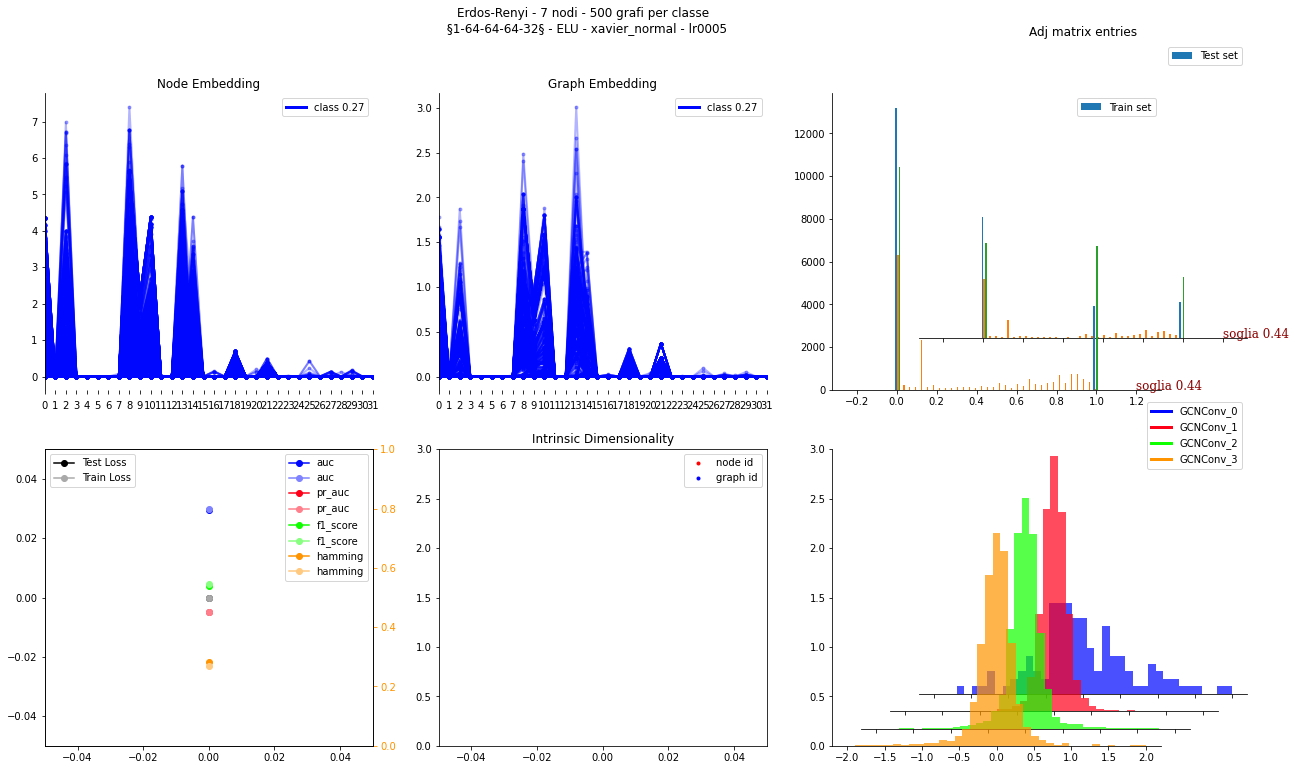

In [4]:
trainer.produce_traning_snapshot(0, 0, False, [], unico_plot=True, notsave=True)

(<Metrics.Metrics at 0x7f68c2faa730>, <Metrics.Metrics at 0x7f68c86756a0>)

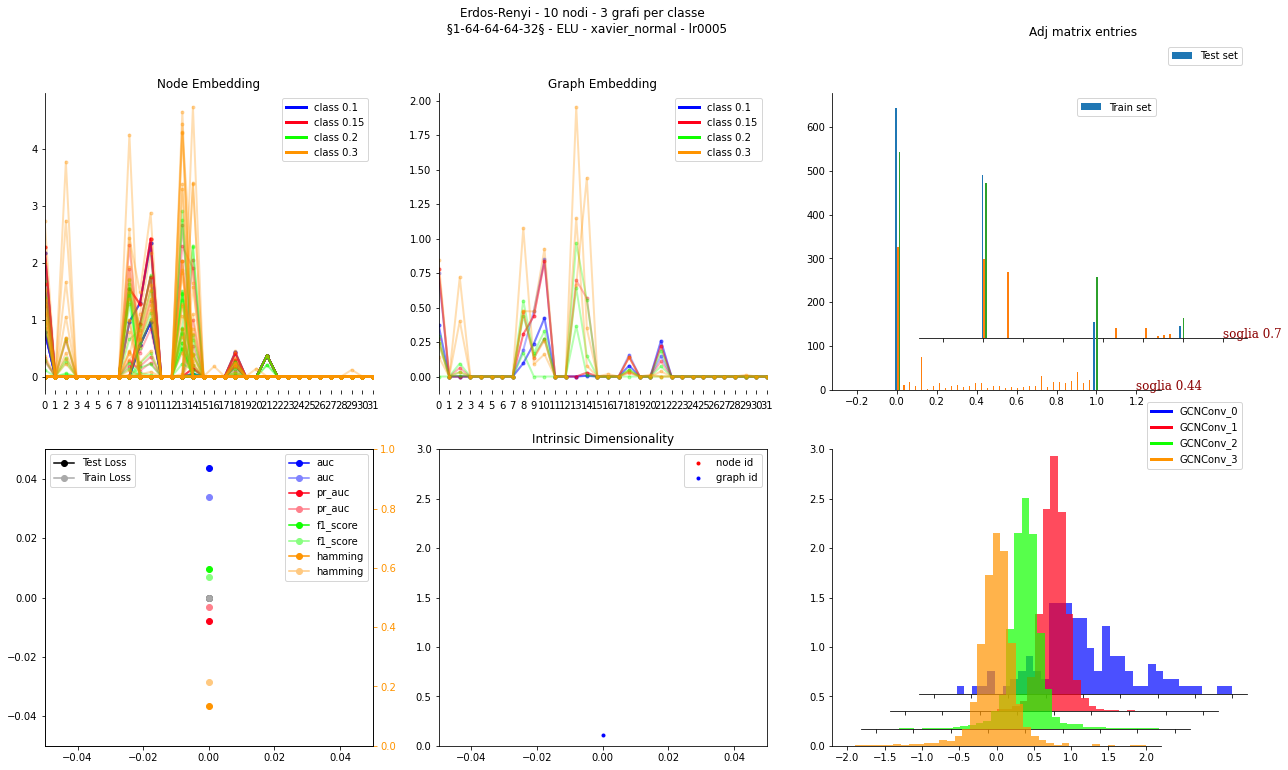

In [29]:
1* 128*64*32, 100*100*15 ,2**45

(262144, 150000, 35184372088832)

In [30]:
def permnodes(N):
    link = (N*(N-1))/2
    return 2**link

list(map(permnodes, [10,9,8,7,6,5,4,3,2]))

[35184372088832.0,
 68719476736.0,
 268435456.0,
 2097152.0,
 32768.0,
 1024.0,
 64.0,
 8.0,
 2.0]

In [ ]:
batch_data = trainer.dataset.sample_dummy_data()
plot = plot_model(trainer.model, batch_data)

In [5]:
traced_model = torch.jit.trace(model, [batch_data.x, batch_data.edge_index])
traced_model.eval()
for p in traced_model.parameters():
    p.requires_grad_(False)

In [ ]:
#d = make_graph(traced_model, classes_to_visit='Sequential')

gr = traced_model.graph
toshow = []
# list(traced_model.graph.nodes())[0]
self_input = next(gr.inputs())
print(self_input)
get_methods(self_input)
self_type = self_input.graphtype().str().split('.')[-1]

In [7]:
type(self_input)

torch._C.Value

In [31]:
import torchvision
m = torchvision.models.resnet18()
m.layer1[0]

BasicBlock(
  (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [ ]:
d = make_graph(m, classes_to_visit='Sequential')

# Numero di grafi diversi (non isomorfi) dato il numero di nodi e link

In [93]:
import networkx as nx
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt

def generate_all_possible_graphs(num_nodes, num_edges):
    possible_edges = list(combinations(range(num_nodes), 2))
    #print(list(combinations(possible_edges, num_edges)))
    
    all_graphs = []
    
    for edge_combination in combinations(possible_edges, num_edges):
        graph = nx.Graph()
        graph.add_nodes_from(range(num_nodes))
        graph.add_edges_from(edge_combination)
        
        all_graphs.append(graph)
    
    return all_graphs

def count_non_isomorphic(graphs):
    non_iso_count = 0
    for i, G in enumerate(graphs):
        is_iso = False
        for j in range(i):
            if nx.is_isomorphic(G, graphs[j]):
                is_iso = True
                break
        if not is_iso:
            non_iso_count += 1
    return non_iso_count

n = 4  # Number of nodes
k = 3  # Number of edges

def non_iso_graphs(n, k):
    graphs = generate_all_possible_graphs(n, k)
    non_iso_count = count_non_isomorphic(graphs)
    print(f"Number of non-isomorphic graphs with {n} nodes and {k} edges: {non_iso_count}")


In [4]:
n = 50
p = 0.3
average_k = int(p*n)
print(f"numero medio di link con {n} nodi: {average_k}")

numero medio di link con 50 nodi: 15


In [ ]:
non_iso_graphs(n,average_k)


KeyboardInterrupt



In [81]:
def stats(n,p):
    gr = nx.erdos_renyi_graph(n, p)
    degree_sequence = nx.to_numpy_array(gr).sum(axis=1)
    media_links_per_nodo = degree_sequence.mean()
    std_links_per_nodo = degree_sequence.std()
    
    # controllo eventuali nodi rimasti soli
    Gcc = sorted(nx.connected_components(gr), key=len, reverse=True)
    gr0 = gr.subgraph(Gcc[0]).copy()
    degree_sequence_giant = nx.to_numpy_array(gr0).sum(axis=1)    
    media_links_per_nodo_giant = degree_sequence_giant.mean()
    std_links_per_nodo_giant = degree_sequence_giant.std()
    
    return degree_sequence.sum(), media_links_per_nodo, std_links_per_nodo, degree_sequence_giant.sum(), media_links_per_nodo_giant, std_links_per_nodo_giant

p = 0.27
for n in range(4,20):
    average_k = round(p*n,2) 
    statistiche = []
    for j in range(100):
        statistiche.append(stats(n,p))
    statistiche = np.array(statistiche)
    degree_sequence, media_links_per_nodo, std_links_per_nodo, degree_sequence_giant, media_links_per_nodo_giant, std_links_per_nodo_giant = statistiche.T
    degree_sequence = degree_sequence.mean()
    media_links_per_nodo = media_links_per_nodo.mean()
    std_links_per_nodo = std_links_per_nodo.mean()
    degree_sequence_giant = degree_sequence_giant.mean()
    media_links_per_nodo_giant = media_links_per_nodo_giant.mean()
    std_links_per_nodo_giant = std_links_per_nodo_giant.mean()
    print(f"Num link medio con {n} nodi: {average_k} \t\t totale_links: {degree_sequence}, \t link_attuali_media_per_nodo: {round(media_links_per_nodo,2)},\t link_attuali_std_per_nodo: {round(std_links_per_nodo, 2)}")
    print(f"\t\t\t\t\t\t totale_links: {degree_sequence_giant}, \t link_attuali_media_per_nodo: {round(media_links_per_nodo_giant,2)},\t link_attuali_std_per_nodo: {round(std_links_per_nodo_giant, 2)}")
    print("\n")

Num link medio con 4 nodi: 1.08 		 totale_links: 3.6, 	 link_attuali_media_per_nodo: 0.9,	 link_attuali_std_per_nodo: 0.48
						 totale_links: 3.48, 	 link_attuali_media_per_nodo: 1.14,	 link_attuali_std_per_nodo: 0.25


Num link medio con 5 nodi: 1.35 		 totale_links: 5.44, 	 link_attuali_media_per_nodo: 1.09,	 link_attuali_std_per_nodo: 0.63
						 totale_links: 5.2, 	 link_attuali_media_per_nodo: 1.4,	 link_attuali_std_per_nodo: 0.37


Num link medio con 6 nodi: 1.62 		 totale_links: 8.16, 	 link_attuali_media_per_nodo: 1.36,	 link_attuali_std_per_nodo: 0.73
						 totale_links: 7.72, 	 link_attuali_media_per_nodo: 1.61,	 link_attuali_std_per_nodo: 0.56


Num link medio con 7 nodi: 1.89 		 totale_links: 11.06, 	 link_attuali_media_per_nodo: 1.58,	 link_attuali_std_per_nodo: 0.87
						 totale_links: 10.26, 	 link_attuali_media_per_nodo: 1.86,	 link_attuali_std_per_nodo: 0.7


Num link medio con 8 nodi: 2.16 		 totale_links: 15.12, 	 link_attuali_media_per_nodo: 1.89,	 link_attuali_

In [89]:
n = 7
average_k = round(p*n,2)
statistiche = []
for j in range(10000):
    statistiche.append(stats(n,p))
statistiche = np.array(statistiche)
degree_sequence, media_links_per_nodo, std_links_per_nodo, degree_sequence_giant, media_links_per_nodo_giant, std_links_per_nodo_giant = statistiche.T
print(f"Num link medio con {n} nodi: {average_k} \t\t totale_links: {degree_sequence.mean()}, \t link_attuali_media_per_nodo: {round(media_links_per_nodo.mean(),2)},\t link_attuali_std_per_nodo: {round(std_links_per_nodo.mean(), 2)}")
print(f"\t\t\t\t\t\t totale_links: {degree_sequence_giant.mean()}, \t link_attuali_media_per_nodo: {round(media_links_per_nodo_giant.mean(),2)},\t link_attuali_std_per_nodo: {round(std_links_per_nodo_giant.mean(), 2)}")

Num link medio con 7 nodi: 1.89 		 totale_links: 11.3094, 	 link_attuali_media_per_nodo: 1.62,	 link_attuali_std_per_nodo: 0.88
						 totale_links: 10.701, 	 link_attuali_media_per_nodo: 1.9,	 link_attuali_std_per_nodo: 0.71


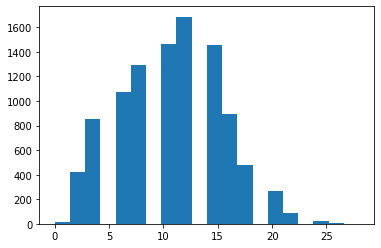

In [98]:
plt.hist(degree_sequence_giant, bins=20);

In [104]:
21*500, 1*64*64*64*32 ,1*32*32*32

(10500, 8388608, 32768)

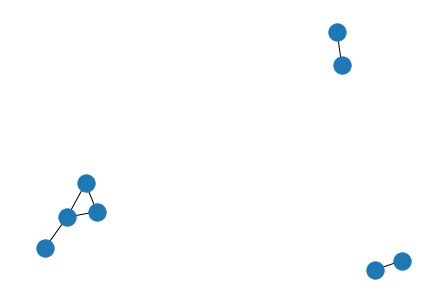

In [49]:
gr = nx.erdos_renyi_graph(8, 0.3)
nx.draw(gr)



In [29]:
nx.to_numpy_array(gr).sum(axis=1)

array([2., 3., 3., 2., 3., 1., 2., 1., 0., 3.])

In [28]:
list(nx.connected_components(gr))

[{0, 1, 2, 3, 4, 5, 6, 7, 9}, {8}]